In [181]:
import pandas as pd

Which unicorn companies have had the biggest return on investment?

How long does it usually take for a company to become a unicorn? Has it always been this way?

Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

Which investors have funded the most unicorns?



In [182]:
df=pd.read_csv('Unicorn_Companies.csv')

In [183]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [184]:
df.shape

(1074, 10)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [186]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

#handling missing data

In [187]:
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [188]:
df[df['City'].isnull()==True]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [189]:
df['City'].mode()#another way to get most frequent city

0    San Francisco
dtype: object

In [190]:
df['City'].value_counts().idxmax()#to get most frequent city

'San Francisco'

In [191]:
df['City'].fillna(df['City'].value_counts().idxmax(),inplace=True)

In [192]:
df['City'].isnull().sum()

0

In [193]:
df[df['Select Investors'].isnull()==True]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [194]:
df['Select Investors'].fillna('Missing data',inplace=True)

In [195]:
df['Select Investors'].isnull().sum()

0

Changing Valuation and Funding from categorical to numeric

In [196]:
def convert_number(dfn):
    if 'B' in dfn:
        return dfn.strip('B').strip('$')+'000000000'
    if 'M' in dfn:
        return dfn.strip('M').strip('$')+'000000'
    

In [197]:
df['Valuation']=df['Valuation'].apply(convert_number)

In [198]:
df['Valuation'].head()

0    180000000000
1    100000000000
2    100000000000
3     95000000000
4     46000000000
Name: Valuation, dtype: object

In [199]:

df['Valuation']=df['Valuation'].astype('float')

In [200]:
df['Funding']=df['Funding'].apply(convert_number)

In [201]:
df['Funding'].head()

0    8000000000
1    7000000000
2    2000000000
3    2000000000
4    4000000000
Name: Funding, dtype: object

In [202]:
df['Funding']=df['Funding'].astype('float')

In [203]:
df.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [204]:
df['Date Joined']=pd.to_datetime(df['Date Joined'])

In [205]:
df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                    float64
Select Investors            object
dtype: object

In [206]:
df['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2011-12-12
Name: Date Joined, dtype: datetime64[ns]

In [207]:
#changed Date joined from object to date type

In [208]:
df.duplicated().sum()

0

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

How long does it usually take for a company to become a unicorn? Has it always been this way?


In [210]:
df['year_it_became_unicorn']=df['Date Joined'].dt.year

In [211]:
df['year_it_became_unicorn'].head()

0    2017
1    2012
2    2018
3    2014
4    2011
Name: year_it_became_unicorn, dtype: int64

In [212]:
df['Number of years taken to become a unicorn ']=df['year_it_became_unicorn']-df['Year Founded']

In [213]:
df['Number of years taken to become a unicorn '].head()

0     5
1    10
2    10
3     4
4     6
Name: Number of years taken to become a unicorn , dtype: int64

Text(0.5, 1.0, 'Time taken in years for the companies to become unicorns')

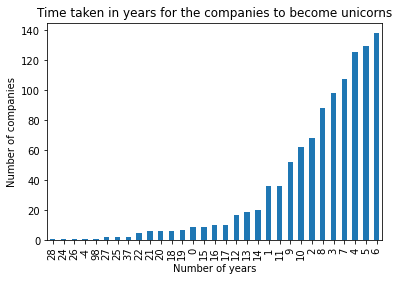

In [214]:
df['Number of years taken to become a unicorn '].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Number of years')
plt.ylabel('Number of companies')
plt.title('Time taken in years for the companies to become unicorns')

average time takenin years to become a unicorn

In [215]:
df['Number of years taken to become a unicorn '].mean()

7.000931098696462

In [216]:
#how has the number of years taken to become a unicorn changes over the years

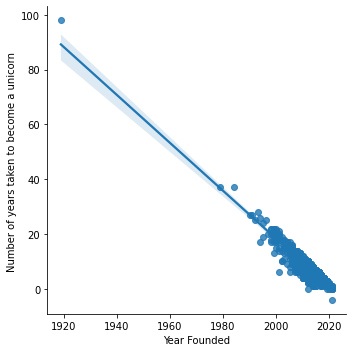

In [217]:
sns.lmplot(x='Year Founded',y='Number of years taken to become a unicorn ',data=df)

we can see that the For the companies founded in the past two decades the time taken to turn into unicorns is far less than those companies who have been found before two decades

Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

In [218]:

df.groupby('Country')['Company'].count().sort_values(ascending=False)

Country
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                12
Australia                 8
Netherlands               6
Mexico                    6
Hong Kong                 6
Sweden                    6
Indonesia                 6
Japan                     5
Ireland                   5
Switzerland               5
Norway                    4
Finland                   4
Spain                     3
United Arab Emirates      3
Turkey                    3
Belgium                   3
Thailand                  2
Chile                     2
South Africa              2
Colombia                  2
Estonia                   2
Denmark                   2
Philippines               2
Austria                   2
Vietnam                   2
Argentina   

USA,CHINA,INDIA have the most number of unicorns in that order

In [219]:
df_industry_hub_cities=df.groupby(['City','Industry'])['Company'].count().sort_values(ascending=False)

In [220]:
df_industry_hub_cities.iloc[0:10]

City           Industry                       
San Francisco  Internet software & services       56
               Fintech                            47
New York       Fintech                            33
London         Fintech                            24
New York       Internet software & services       20
               Health                             14
San Francisco  Health                             12
Beijing        E-commerce & direct-to-consumer    11
Shanghai       Auto & transportation              10
San Francisco  Artificial intelligence            10
Name: Company, dtype: int64

San Francisco,New York and London are focusing on Fintech,San Francisco also has a huge focus on Internet Software and Services

Which investors have funded the most unicorns?

In [339]:
df_investors=[]

In [340]:
for i in df['Select Investors'].str.split(','):
    df_investors.append(i)

In [354]:
df_investors[0:3]

[['Sequoia Capital China',
  ' SIG Asia Investments',
  ' Sina Weibo',
  ' Softbank Group'],
 ['Founders Fund', ' Draper Fisher Jurvetson', ' Rothenberg Ventures'],
 ['Tiger Global Management',
  ' Sequoia Capital China',
  ' Shunwei Capital Partners']]

In [342]:
df_i=[]

In [343]:
for i in df_investors:
    for j in i:
        df_i.append(j)

In [355]:
df_i[0:3]

['Sequoia Capital China', ' SIG Asia Investments', ' Sina Weibo']

In [345]:
df_i_seriess=pd.Series(df_i)

In [346]:
df_c=df_i_seriess.value_counts().sort_values(ascending=False)

Text(0.5, 1.0, 'Top ten Investors')

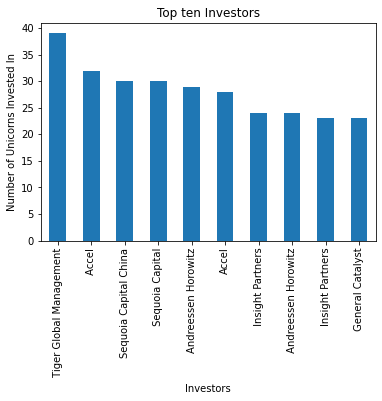

In [350]:
df_c.iloc[0:10].plot(kind='bar')
plt.xlabel('Investors')
plt.ylabel('Number of Unicorns Invested In')
plt.title('Top ten Investors')

Which unicorn companies have had the biggest return on investment?


In [351]:
df_company_roi=df[['Company','Funding','Valuation']]

In [353]:
df_company_roi.sort_values(by=['Funding','Valuation'],ascending=[True,False]).iloc[0:10]

,Company,Funding,Valuation
189,Otto Bock HealthCare,0.0,4.000000e+09
239,Zapier,1000000.0,4.000000e+09
792,Workhuman,9000000.0,1.000000e+09
743,Manner,10000000.0,1.000000e+09
760,GalaxySpace,14000000.0,1.000000e+09
1012,Revolution Precrafted,15000000.0,1.000000e+09
942,Injective Protocol,17000000.0,1.000000e+09
361,CFGI,19000000.0,2.000000e+09
368,Il Makiage,29000000.0,2.000000e+09
794,L&P Cosmetic,33000000.0,1.000000e+09


top ten companies with minimum funding and maximum company valuation